<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW6/HW6Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#imports 
from matplotlib.cbook import contiguous_regions
from matplotlib.pyplot import figure
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib


In [23]:
#read in data
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [24]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


In [25]:
#encoder 
le = preprocessing.LabelEncoder()

#new dataframe with encoded data
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [26]:
#X and Y train/Test 
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']

# 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

#***Making the Model***
returns a Decision Tree Classifiers with a max leaf node of 5 populated with the train data

In [27]:
def makeDTModel(cri, X_train, y_train, leaf, depth):
  return DecisionTreeClassifier(criterion = cri, 
                                         max_leaf_nodes=leaf,
                                         #max_depth = depth,
                                         random_state = 120).fit(X_train, y_train)

In [28]:
cart_classifier = makeDTModel("gini", X_train, y_train, 3, 3)
c5_classifier = makeDTModel("entropy", X_train, y_train, 5, 3)

# ***Displaying the Tree***
This method displays the Decision Tree model made above. It will also print all the rules of the tree

In [29]:
def displayTree(classifier, X):
 
  figure(figsize=(10, 8), dpi=80)

  # Plot the tree
  cn = ['low_income', 'hi_income']
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), 
                                  class_names=cn,
                                  filled = True)


  # Print the text version of the tree
  text_representation = tree.export_text(classifier, 
                                        feature_names=X.columns.values.tolist())
  print(text_representation)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



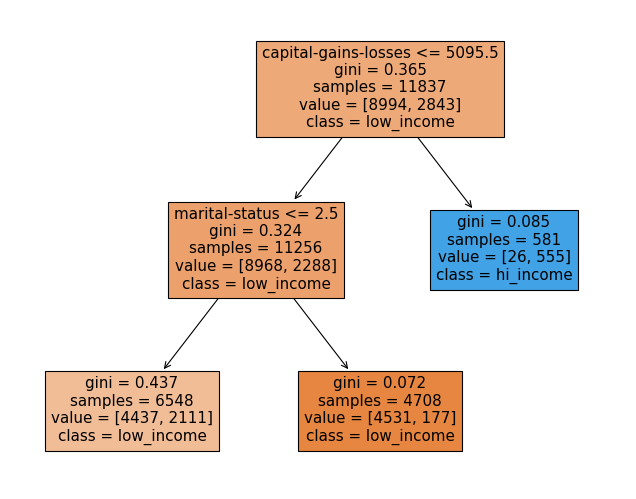

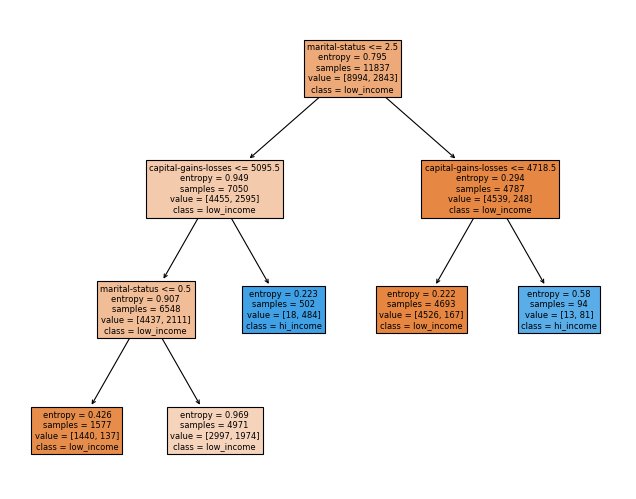

In [30]:
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

#***Max_Depth and Max_Leaf_Node***
###Max_depth = the amount of leavles there are in the tree
###Max_leaf_Nodes = amount of leafs there are in the tree

In [31]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


# ***Displaying the Matrix***
will print a matrix of True positives, true negatives, fasle positives, and false negatives. It will also plot a heatmap of the matrix
 

In [11]:
def displayCM(classifier, X_train, y_train, X_test, y_test):

  # Record predictions
  predictions = classifier.predict(X_test)


  # Compute TP, TN, FP, FN values for CM
  cm = confusion_matrix(y_true=y_test, 
                            y_pred = predictions)


  # Prints confusion matrix
  print(cm)

  #prints Heatmap 
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, 
              linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

[[2238   11]
 [ 583  128]]


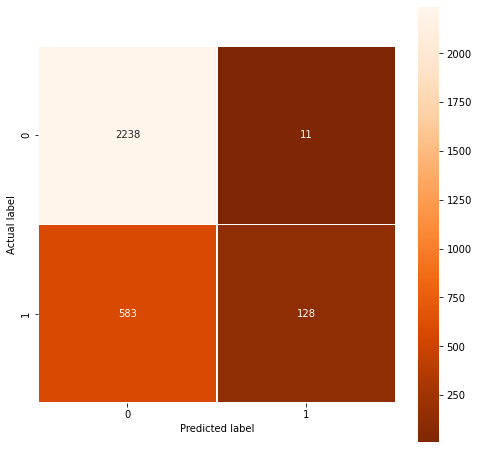

In [12]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2235   14]
 [ 583  128]]


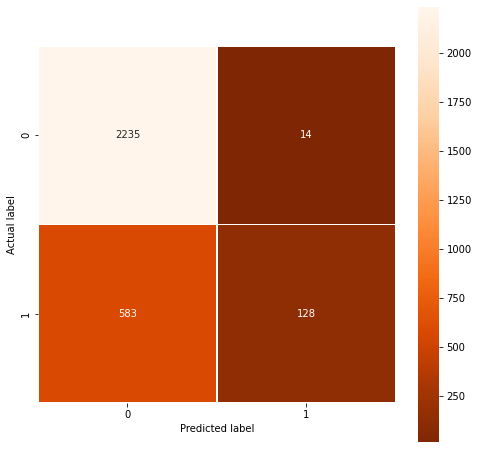

In [13]:
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

In [14]:
def compareModels(cart_classifier, c5_classifier):
  
  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()


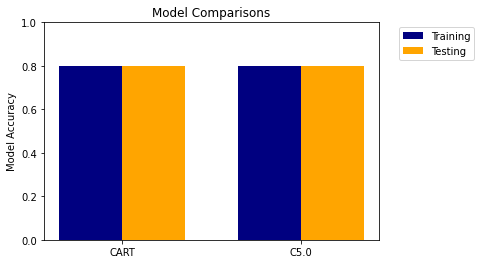

In [15]:
# create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier)

#***Conclusion***
After testing both C 5.0 and CART methods my test showed me that both methods scored the exact same, 80%. Maybe a larger data set will change the outcome of this test. although they scored the same C 5.0 did have more false positives while CART had more false negitives.